Epoch 1/5
118/118 [==============================] - 1s 6ms/step - loss: 2.0087 - accuracy: 0.2603
Epoch 2/5
118/118 [==============================] - 1s 5ms/step - loss: 1.2294 - accuracy: 0.5692
Epoch 3/5
118/118 [==============================] - 1s 5ms/step - loss: 0.9289 - accuracy: 0.6855
Epoch 4/5
118/118 [==============================] - 1s 5ms/step - loss: 0.8029 - accuracy: 0.7325
Epoch 5/5
118/118 [==============================] - 1s 5ms/step - loss: 0.7277 - accuracy: 0.7589
313/313 - 0s - loss: 0.1709 - accuracy: 0.9628 - 410ms/epoch - 1ms/step


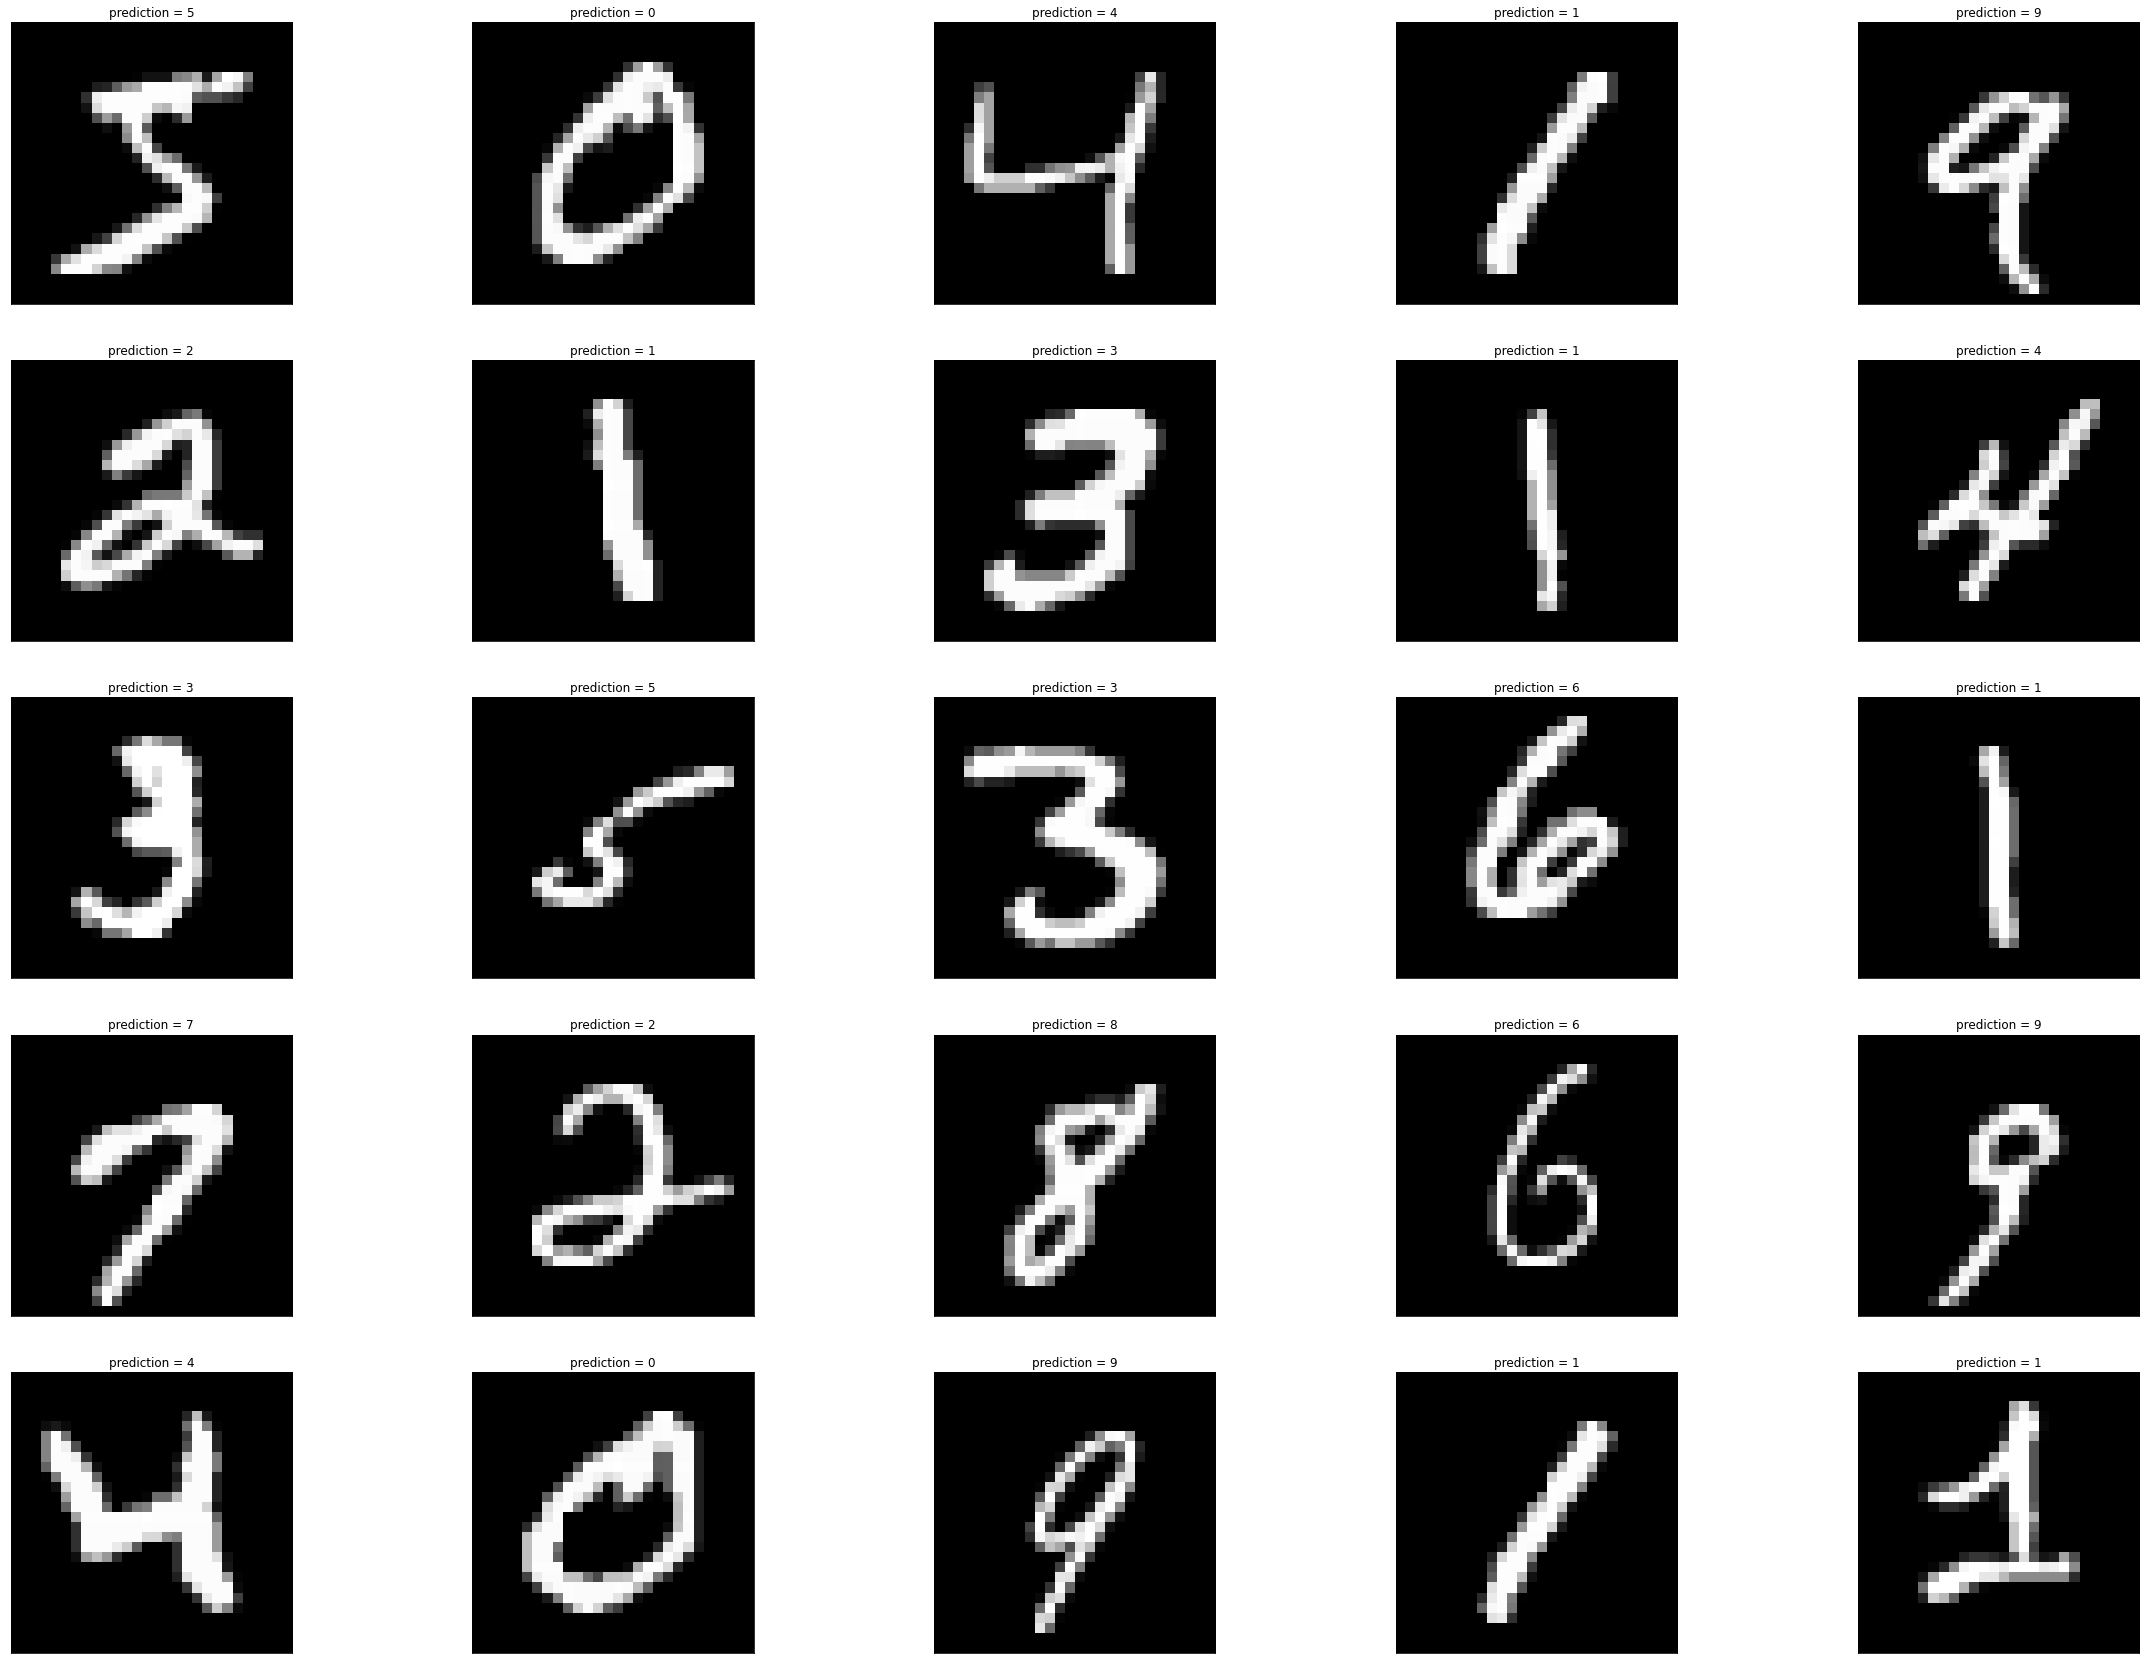

In [2]:
# Imports.
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt


# Set up GPU.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


# Load in the dataset.
dataset = tf.keras.datasets.mnist


# Split the dataset into training and testing data.
(x_train, y_train), (x_test, y_test) = dataset.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


# Normalise the data.
x_train = x_train / 255.0
x_test = x_test / 255.0


# Build the neural network.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation="relu"))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(units=84, activation="relu"))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))


# Complile the model.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# Train the model.
model.fit(x_train, y_train, epochs=5, batch_size=512)


# Evaluate the model.
model.evaluate(x_test, y_test, verbose=2)


# Predict using the model.
N = 25 # Number of test images to predict
y_pred = model.predict(x_test[:N, :, :])

# Plot some results.
plt.rcParams['figure.figsize'] = [40, 30]
fig, axs = plt.subplots(5, 5)
k = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i, j].imshow(x_train[k, :, :, :].reshape((28, 28)), cmap="gray")
        axs[i, j].set_title("prediction = {}".format(y_train[k]))
        axs[i, j].set_yticklabels([])
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticks([])
        axs[i, j].set_xticks([])
        k = k + 1
plt.savefig('predictions.pdf')
